In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Display

In [7]:
# read image
img = cv2.imread('NZ.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

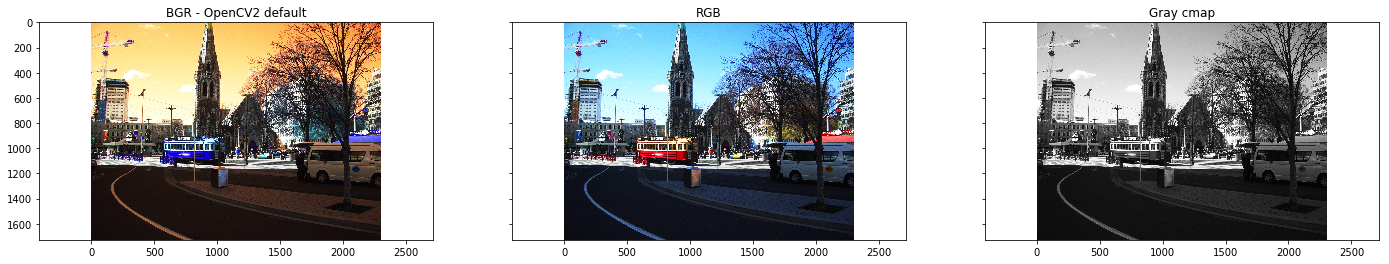

"\n#display using cv2\ncv2.imshow('img', gray)\ncv2.waitKey()\n"

In [8]:
# show image using plt
img2 = img[:,:,::-1] # change BGR to RGB

f, ax = plt.subplots(1, 3, sharey=True, figsize=(24,4))

ax[0].imshow(img)
ax[0].set_title('BGR - OpenCV2 default')

ax[1].imshow(img2)
ax[1].set_title('RGB')

ax[2].imshow(gray, cmap='gray')
ax[2].set_title('Gray cmap')

plt.show()

"""
#display using cv2
cv2.imshow('img', gray)
cv2.waitKey()
"""

# Intensity Transformations

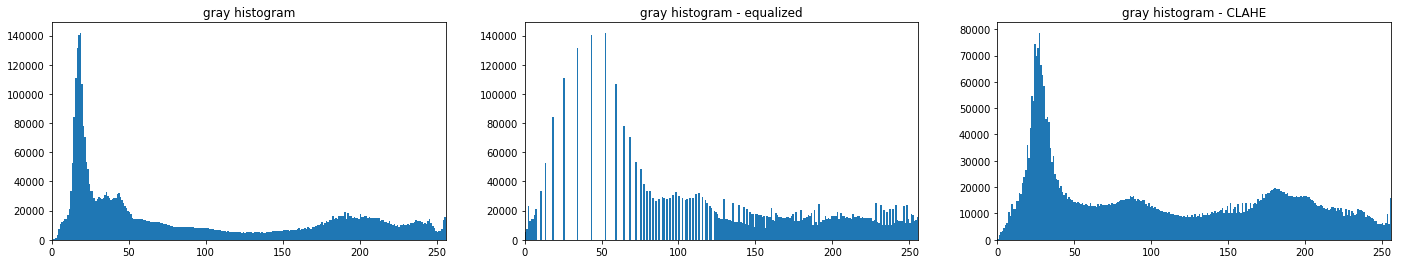

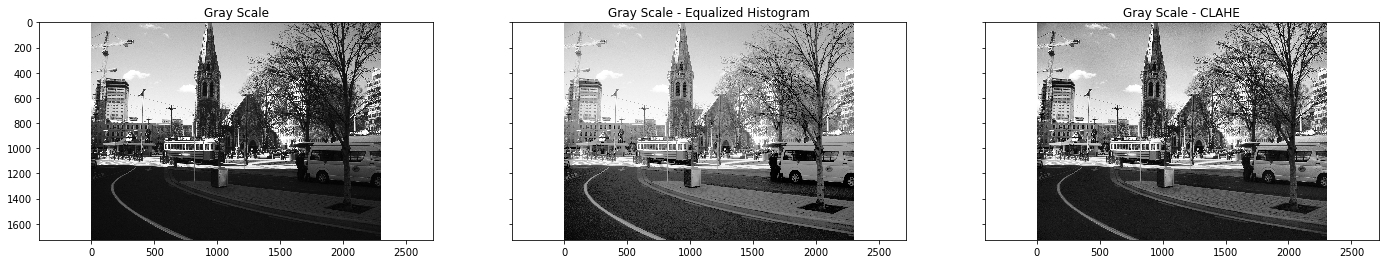

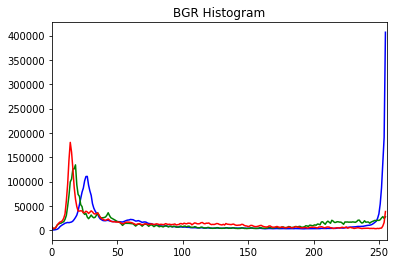

In [9]:
# gray histogram
f = plt.figure(figsize=(24,4))
gray_histogram = gray.ravel()
plt.subplot(131)
plt.hist(gray_histogram, 256, [0,256])
plt.title('gray histogram')
plt.xlim(0,256)
#plt.show()

plt.subplot(132)
equilzed_gray = cv2.equalizeHist(gray)
plt.hist(equilzed_gray.ravel(), 256, [0,256])
plt.title('gray histogram - equalized')
plt.xlim(0,256)
#plt.show()

# Contrat Limited Adaptive Historgram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # create a CLAHE object (Args are optional)
cl1 = clahe.apply(gray)

plt.subplot(133)
plt.hist(cl1.ravel(), 256, [0,256])
plt.title('gray histogram - CLAHE')
plt.xlim(0,256)
plt.show()

f, ax = plt.subplots(1, 3, sharey=True, figsize=(24,4))

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Gray Scale')

ax[1].imshow(equilzed_gray, cmap='gray')
ax[1].set_title('Gray Scale - Equalized Histogram')

ax[2].imshow(cl1, cmap='gray')
ax[2].set_title('Gray Scale - CLAHE')

plt.show()


# color histogram
for i,col in enumerate(['b','g','r']):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
plt.xlim(0,256)
plt.title('BGR Histogram')
plt.show()

# Spatial Filters

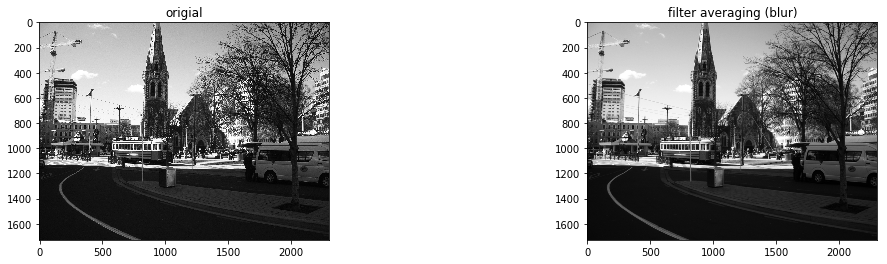

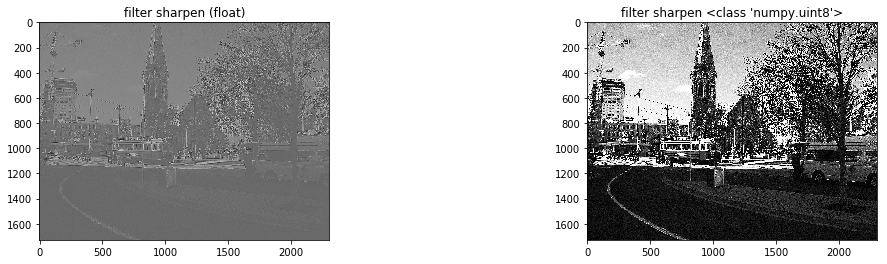

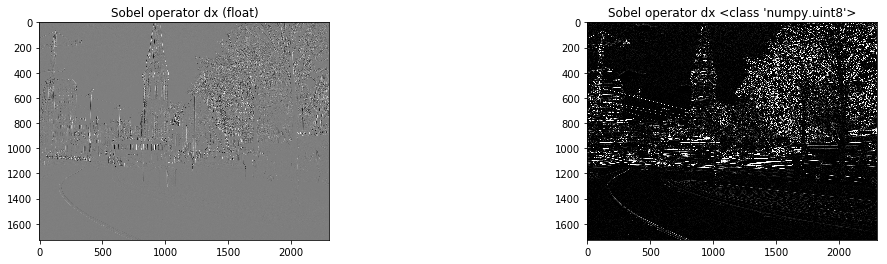

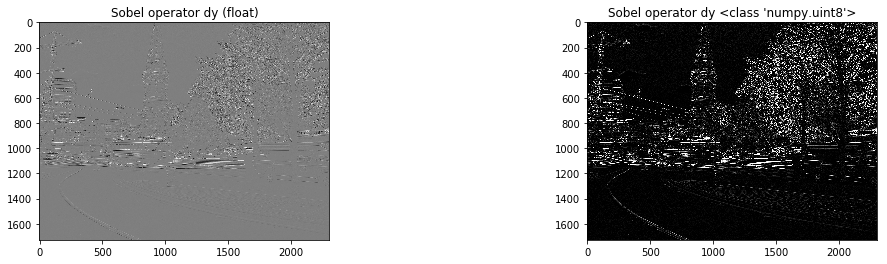

If image is uint*, it can't store negative values
Change image to float: Black is negative, White is postive, and gray is zero


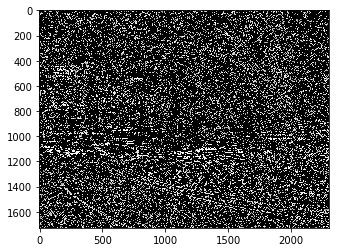

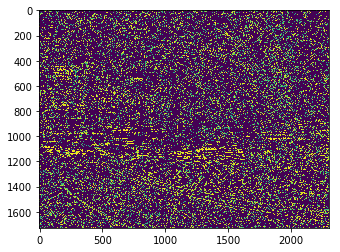

In [10]:
# cv2 has built in functions to apply all these kinds of filters - but for now I'll do it this way
kernel_blur = np.ones((5,5), np.uint8)/25 # box filter (blur)
kernel_sharpen = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]],np.float)
kernel_dx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]],np.float) # Sobel operators - combine smoothing with derivative 
kernel_dy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]],np.float) # Sobel operators - combine smoothing with derivative

f = plt.figure(figsize=(18,4))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('origial')
plt.subplot(122), plt.imshow(cv2.filter2D(gray.astype(np.float), -1, kernel_blur), cmap='gray'), plt.title('filter averaging (blur)')
plt.show()

f = plt.figure(figsize=(18,4))
plt.subplot(121), plt.imshow(cv2.filter2D(gray.astype(np.float), -1, kernel_sharpen), cmap='gray'), plt.title('filter sharpen (float)')
plt.subplot(122), plt.imshow(cv2.filter2D(gray, -1, kernel_sharpen), cmap='gray'), plt.title('filter sharpen {}'.format(type(gray[0,0])))
plt.show()


# Sobel operators - combine smoothing with derivative
f = plt.figure(figsize=(18,4))
plt.subplot(121), plt.imshow(cv2.filter2D(gray.astype(np.float), -1, kernel_dx), cmap='gray'), plt.title('Sobel operator dx (float)')
plt.subplot(122), plt.imshow(cv2.filter2D(gray, -1, kernel_dy), cmap='gray'), plt.title('Sobel operator dx {}'.format(type(gray[0,0])))
plt.show()
f = plt.figure(figsize=(18,4))
plt.subplot(121), plt.imshow(cv2.filter2D(gray.astype(np.float), -1, kernel_dy), cmap='gray'), plt.title('Sobel operator dy (float)')
plt.subplot(122), plt.imshow(cv2.filter2D(gray, -1, kernel_dy), cmap='gray'), plt.title('Sobel operator dy {}'.format(type(gray[0,0])))
plt.show()
print("If image is uint*, it can't store negative values")
print("Change image to float: Black is negative, White is postive, and gray is zero")

# calculate the intensity angles
Ix = cv2.filter2D(gray.astype(np.float), -1, kernel_dx)
Iy = cv2.filter2D(gray.astype(np.float), -1, kernel_dy)
ang = np.arctan2(Ix,Iy)


# figure out a better way to do this
# basically there are so many angles that this function zeros things out
# air planes are not a great example for this - a picture of the moon is better
for row in range(len(ang)):
    for c in range(len(ang[row])):
        if ang[row,c] < 100/180 * np.pi:
            ang[row,c] = 0
plt.imshow(ang, cmap='gray')
plt.show()
plt.imshow(ang)
plt.show()

# Morphological Processing


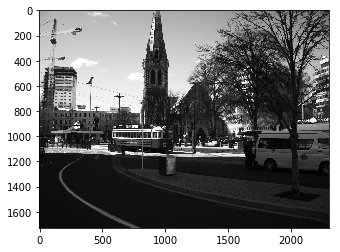

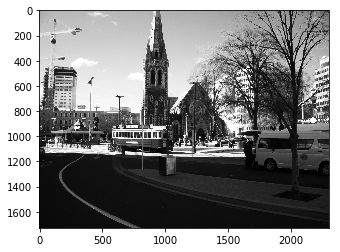

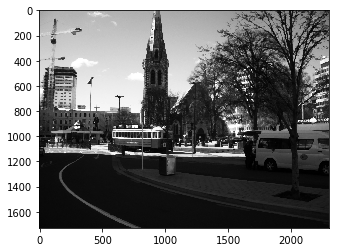

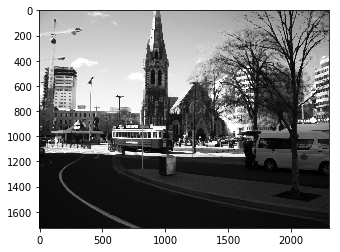

In [11]:
morph_kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, morph_kernel)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, morph_kernel)

open_close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, morph_kernel)
close_open = cv2.morphologyEx(closing, cv2.MORPH_OPEN, morph_kernel)
plt.imshow(opening, cmap='gray')
plt.show()
plt.imshow(closing, cmap='gray')
plt.show()
plt.imshow(open_close, cmap='gray')
plt.show()
plt.imshow(close_open, cmap='gray')
plt.show()